In [1]:
# Imports

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Dataset 1

## Data Preprocessing (Filtering words)

In [2]:
# Importing the dataset

df = pd.read_csv('Data/Dataset-1.csv')

print(df.shape)
print(df.columns)

(20972, 9)
Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')


In [3]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Keeping full stops for sentence tokenization
    text = re.sub(r'[^a-zA-Z\s.]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', text).strip()

    sentences = sent_tokenize(cleaned_text)
    
    # Removing fullstops for sentence tokenization
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    
    words = word_tokenize(cleaned_text)

    filtered_words = [word for word in words if word.lower() not in stop_words]
    stemmed_words = [ps.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return cleaned_text, sentences, filtered_words, stemmed_words, lemmatized_words

In [4]:
# Looping through the df, tokenizing the data in "TITLE", "ABSTRACT" columns and storing them in new columns

data_list = []

for i in range(0, df.shape[0]):
    title = df.loc[i, 'TITLE']
    abstract = df.loc[i, 'ABSTRACT']
    
    # title = title.split()
    # abstract = abstract.split()
    
    cleaned_text_title, sentences_title, filtered_words_title, stemmed_words_title, lemmatized_words_title = preprocess_text(title)
    cleaned_text_abstract, sentences_abstract, filtered_words_abstract, stemmed_words_abstract, lemmatized_words_abstract = preprocess_text(abstract)
    
    # print("Title: ", title)
    # print("Cleaned Text Title: ", cleaned_text_title)
    # print("Sentences Title: ", sentences_title)
    # print("Filtered Words Title: ", filtered_words_title)
    # print("Stemmed Words Title: ", stemmed_words_title)
    # print("Lemmatized Words Title: ", lemmatized_words_title)
    
    # print(type(cleaned_text_title))
    # print(type(filtered_words_title))
    # print(type(stemmed_words_title))
    # print(type(lemmatized_words_title))
    
    data_list.append({
        "Original Title": title,
        "Cleaned Title": cleaned_text_title,
        "Filtered Words Title": " ".join(filtered_words_title),
        "Stemmed Words Title": " ".join(stemmed_words_title),
        "Lemmatized Words Title": " ".join(lemmatized_words_title),
        "Original Abstract": abstract,
        "Cleaned Abstract": cleaned_text_abstract,
        "Filtered Words Abstract": " ".join(filtered_words_abstract),
        "Stemmed Words Abstract": " ".join(stemmed_words_abstract),
        "Lemmatized Words Abstract": " ".join(lemmatized_words_abstract),
    })
    
    

df_processed = pd.DataFrame(data_list)

df_processed = df_processed.dropna()

df_processed.reset_index(drop=True, inplace=True)

print(df_processed.shape)

df_processed.to_csv("processed_text.csv", index=False)


(20972, 10)


In [5]:
print(df_processed.head())
print(df_processed.columns)

print(df_processed.shape)

                                      Original Title  \
0        Reconstructing Subject-Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics and Poisson kernels fo...   
3  A finite element approximation for the stochas...   
4  Comparative study of Discrete Wavelet Transfor...   

                                       Cleaned Title  \
0        Reconstructing Subject Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics and Poisson kernels fo...   
3  A finite element approximation for the stochas...   
4  Comparative study of Discrete Wavelet Transfor...   

                                Filtered Words Title  \
0        Reconstructing Subject Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics Poisson kernels polyha...   
3  finite element approximation stochastic Maxwel...   
4  Comparative study Discrete Wavelet Transfor

## TF-IDF

In [2]:
df1 = pd.read_csv('Data/Dataset-1.csv')
df2 = pd.read_csv('processed_text.csv')

df = pd.concat([df1, df2], axis=1)
print(df.shape)

(20972, 19)


In [3]:
nan_rows = df[df.isna().any(axis=1)]

print(nan_rows)

df = df.dropna()

print(df.shape)

        ID    TITLE                                           ABSTRACT  \
8270  8271  D4M 3.0    The D4M tool is used by hundreds of research...   

      Computer Science  Physics  Mathematics  Statistics  \
8270                 1        0            0           0   

      Quantitative Biology  Quantitative Finance Original Title Cleaned Title  \
8270                     0                     0        D4M 3.0          D M    

     Filtered Words Title Stemmed Words Title Lemmatized Words Title  \
8270                  NaN                 NaN                    NaN   

                                      Original Abstract  \
8270    The D4M tool is used by hundreds of research...   

                                       Cleaned Abstract  \
8270  The D M tool is used by hundreds of researcher...   

                                Filtered Words Abstract  \
8270  tool used hundreds researchers perform complex...   

                                 Stemmed Words Abstract  \
8270  

In [4]:
Y = df[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

print(Y.shape)
print(Y[:5][:])

(20971, 6)
   Computer Science  Physics  Mathematics  Statistics  Quantitative Biology  \
0                 1        0            0           0                     0   
1                 1        0            0           0                     0   
2                 0        0            1           0                     0   
3                 0        0            1           0                     0   
4                 1        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["PROCESSED_TEXT"] = df["Filtered Words Title"] + " " + df["Filtered Words Abstract"]

print(df["PROCESSED_TEXT"][0])

tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(df["PROCESSED_TEXT"])

print(X_tfidf)

Reconstructing Subject Specific Effect Maps Predictive models allow subject specific inference analyzing disease related alterations neuroimaging data Given subject data inference made two levels global ie identifiying condition presence subject local ie detecting condition effect individual measurement extracted subject data global inference widely used local inference used form subject specific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named RSM improve subject specific detections predictive modeling approaches particular binary classifiers RSM specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrapper type algorithm used different binary classifiers diagnostic manner ie without information condition presence Reconstruction posed Maximum Posteriori problem prior model whose parameters estimated training data clas

In [6]:
# Save the tfidf transform using joblib
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset, Subset

X_tfidf_tensor = torch.tensor(X_tfidf.toarray(), dtype=torch.float32)
Y_tensor = torch.tensor(Y.values, dtype=torch.long)

dataset = TensorDataset(X_tfidf_tensor, Y_tensor)

# Compute split indices
total_size = len(dataset)
train_size = int(0.5 * total_size)  # 50%
val_size = int(0.2 * total_size)    # 20%
test_size = total_size - train_size - val_size  # 30%

train_dataset = Subset(dataset, range(0, train_size))
val_dataset = Subset(dataset, range(train_size, train_size + val_size))
test_dataset = Subset(dataset, range(train_size + val_size, total_size))

print(len(train_dataset), len(val_dataset), len(test_dataset))

10485 4194 6292


In [2]:
import torch

torch.save({
    "train": train_dataset,
    "val": val_dataset,
    "test": test_dataset
}, "dataset.pth")

print("Datasets saved successfully!")


NameError: name 'train_dataset' is not defined

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

loaded_data = torch.load("dataset.pth")
train_dataset = loaded_data["train"]
val_dataset = loaded_data["val"]
test_dataset = loaded_data["test"]

/tmp/ipykernel_5952/105726720.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load("dataset.pth")


In [3]:
batch_size = 32
train_loader_tfidf = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_tfidf = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_tfidf = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(len(train_loader_tfidf))
print(len(val_loader_tfidf))
print(len(test_loader_tfidf))

328
132
197


# Dataset 2

In [42]:
# Importing the dataset

df = pd.read_csv('Data/Dataset-2.csv')

print(df.shape)
print(df.columns)

(3927, 3)
Index(['ID', 'Content', 'Domain'], dtype='object')


In [43]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Keeping full stops for sentence tokenization
    text = re.sub(r'[^a-zA-Z\s.]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', text).strip()

    sentences = sent_tokenize(cleaned_text)
    
    # Removing fullstops for sentence tokenization
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    
    words = word_tokenize(cleaned_text)

    filtered_words = [word for word in words if word.lower() not in stop_words]
    stemmed_words = [ps.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return cleaned_text, sentences, filtered_words, stemmed_words, lemmatized_words

In [46]:
# Looping through the df, tokenizing the data in "TITLE", "ABSTRACT" columns and storing them in new columns

data_list = []

for i in range(0, df.shape[0]):
    content = df.loc[i, 'Content']
    
    # content = content.split()
    
    cleaned_text_content, sentences_content, filtered_words_content, stemmed_words_content, lemmatized_words_content = preprocess_text(content)
    
    # print("content: ", content)
    # print("Cleaned Text content: ", cleaned_text_content)
    # print("Sentences content: ", sentences_content)
    # print("Filtered Words content: ", filtered_words_content)
    # print("Stemmed Words content: ", stemmed_words_content)
    # print("Lemmatized Words content: ", lemmatized_words_content)
    
    # print(type(cleaned_text_content))
    # print(type(filtered_words_content))
    # print(type(stemmed_words_content))
    # print(type(lemmatized_words_content))
    
    data_list.append({
        "Original content": content,
        "Cleaned content": cleaned_text_content,
        "Filtered Words content": " ".join(filtered_words_content),
        "Stemmed Words content": " ".join(stemmed_words_content),
        "Lemmatized Words content": " ".join(lemmatized_words_content),
    })
    
    

df_processed = pd.DataFrame(data_list)

df_processed = df_processed.dropna()

df_processed.reset_index(drop=True, inplace=True)

print(df_processed.shape)

df_processed.to_csv("processed_text_d_2.csv", index=False)


(3927, 5)


In [47]:
print(df_processed.head())
print(df_processed.columns)

print(df_processed.shape)

                                    Original content  \
0  engali Binodiini Ekti Natir Putul Chaalchitro ...   
1   ChiefsAholic A Wolf In Chiefs Clothing articl...   
2  Kabandha Your Rating Write a review Optional C...   
3  In Bruges 2008 R 1h 47m IMDb RATING 79 10 474K...   
4  Men in Black 2012 PG13 1h 46m IMDb RATING 68 1...   

                                     Cleaned content  \
0  engali Binodiini Ekti Natir Putul Chaalchitro ...   
1  ChiefsAholic A Wolf In Chiefs Clothing article...   
2  Kabandha Your Rating Write a review Optional C...   
3  In Bruges R h m IMDb RATING K YOUR RATING Rate...   
4  Men in Black PG h m IMDb RATING K YOUR RATING ...   

                              Filtered Words content  \
0  engali Binodiini Ekti Natir Putul Chaalchitro ...   
1  ChiefsAholic Wolf Chiefs Clothing articleshowc...   
2  Kabandha Rating Write review Optional Characte...   
3  Bruges R h IMDb RATING K RATING Rate POPULARIT...   
4  Men Black PG h IMDb RATING K RATING Rate PO

## TF-IDF

In [49]:
df1 = pd.read_csv('Data/Dataset-2.csv')
df2 = pd.read_csv('processed_text_d_2.csv')

df = pd.concat([df1, df2], axis=1)
print(df.shape)

(3927, 8)


In [50]:
nan_rows = df[df.isna().any(axis=1)]

print(nan_rows)

df = df.dropna()

print(df.shape)

Empty DataFrame
Columns: [ID, Content, Domain, Original content, Cleaned content, Filtered Words content, Stemmed Words content, Lemmatized Words content]
Index: []
(3927, 8)


In [57]:
print(df.columns)

# Using numbers as the labels for the elements in Domain column
df['Domain'] = df['Domain'].astype('category')
df['Domain'] = df['Domain'].cat.codes

# Printing the number of unique values in the Domain column
print(df['Domain'].nunique())

print(df.head())

Y = df['Domain']
print(Y[-5:])

Index(['ID', 'Content', 'Domain', 'Original content', 'Cleaned content',
       'Filtered Words content', 'Stemmed Words content',
       'Lemmatized Words content'],
      dtype='object')
5
   ID                                            Content  Domain  \
0   1  engali Binodiini Ekti Natir Putul Chaalchitro ...       0   
1   2   ChiefsAholic A Wolf In Chiefs Clothing articl...       0   
2   3  Kabandha Your Rating Write a review Optional C...       0   
3   4  In Bruges 2008 R 1h 47m IMDb RATING 79 10 474K...       0   
4   5  Men in Black 2012 PG13 1h 46m IMDb RATING 68 1...       0   

                                    Original content  \
0  engali Binodiini Ekti Natir Putul Chaalchitro ...   
1   ChiefsAholic A Wolf In Chiefs Clothing articl...   
2  Kabandha Your Rating Write a review Optional C...   
3  In Bruges 2008 R 1h 47m IMDb RATING 79 10 474K...   
4  Men in Black 2012 PG13 1h 46m IMDb RATING 68 1...   

                                     Cleaned content  \
0  enga

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["PROCESSED_TEXT"] = df["Filtered Words content"]

print(df["PROCESSED_TEXT"][0])

tfidf_d2 = TfidfVectorizer()

X_tfidf = tfidf_d2.fit_transform(df["PROCESSED_TEXT"])

print(X_tfidf.shape)

engali Binodiini Ekti Natir Putul Chaalchitro Frame Khadaan Shontaan Tekka Padatik Surjo Manikbabur Megh Cl Rajnandini Paul Ama Punjabi Marathi Fussclass Dabhade Sangeet Manapmaan Mukkam PCarry Jatta Rating Write review Optional Characters Remaining Share Facebook Share Twitter ETimes Movies Movie Reviews Punjabi Carry Jatta Carry Jatta UA Jun Punjabi hrs mins Drama Comedy Check Movie Details Critics Rating Avg Users Rating Rate Movie Rating Would like review movie characters left Synopsis Jass falls love Meet seeing wedding two decide notch relationship get married However Jass father advocate Dhillon Meets uncle Dilawer get wrong foot leading Dhillon declining sons wedding Meet Eventually series conspiracies plotting confusions two families agree resulting happy ending Read Read Less Cast Crew Smeep Kang Director Karamjit Anmol Actor Sonam Bajwa Actor Ravneet Kaur Producer Jaswinder Bhalla Actor Gurpreet Ghuggi Actor Binnu Dhillon Actor Gippy Grewal Actor Producer Carry Jatta Movie R

In [88]:
# Save the tfidf transform using joblib
import joblib

joblib.dump(tfidf_d2, 'tfidf_vectorizer_d2.pkl')

['tfidf_vectorizer_d2.pkl']

In [62]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

X_tfidf_tensor = torch.tensor(X_tfidf.toarray(), dtype=torch.float32)
Y_tensor = torch.tensor(Y.values, dtype=torch.long)

dataset = TensorDataset(X_tfidf_tensor, Y_tensor)

# Splitting the above dataset into 50:20:30 ratio for training, validation and testing respectively

# Define split sizes
total_size = len(dataset)
train_size = int(0.5 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size  # Ensure total size remains unchanged

# Perform the split
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [63]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

1963 785 1179


In [64]:
import torch

torch.save({
    "train": train_dataset,
    "val": val_dataset,
    "test": test_dataset
}, "dataset_d2.pth")

print("Datasets saved successfully!")


Datasets saved successfully!


### Load pytorch dataset

In [65]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

loaded_data = torch.load("dataset_d2.pth")
train_dataset = loaded_data["train"]
val_dataset = loaded_data["val"]
test_dataset = loaded_data["test"]

/tmp/ipykernel_5952/3193344288.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load("dataset_d2.pth")


In [66]:
batch_size = 32
train_loader_tfidf = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_tfidf = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_tfidf = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(len(train_loader_tfidf))
print(len(val_loader_tfidf))
print(len(test_loader_tfidf))

62
25
37


# Models

## Model 1, Dataset 1

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define training function
def train_model(model, train_loader, val_loader, num_epochs=5, learning_rate=0.001):
    criterion = nn.BCELoss()  # Binary Cross Entropy for multi-label classification
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.float())  # Ensure labels are float
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.float())
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

In [55]:

# simple Feedforward Neural Network
class MultiLabelNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        self.sigmoid = nn.Sigmoid()  # sigmoid activation for multilabel

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)
    
    
import torch.nn as nn

class MultiLabelNNdeep(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLabelNNdeep, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, num_classes)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Prevents overfitting
        self.sigmoid = nn.Sigmoid()  # For multilabel classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc4(x)
        return self.sigmoid(x)


Epoch 1/20 - Train Loss: 0.3947, Val Loss: 0.2581
Epoch 2/20 - Train Loss: 0.2288, Val Loss: 0.2112
Epoch 3/20 - Train Loss: 0.1916, Val Loss: 0.1988
Epoch 4/20 - Train Loss: 0.1725, Val Loss: 0.1933
Epoch 5/20 - Train Loss: 0.1579, Val Loss: 0.1906
Epoch 6/20 - Train Loss: 0.1463, Val Loss: 0.1889
Epoch 7/20 - Train Loss: 0.1361, Val Loss: 0.1879
Epoch 8/20 - Train Loss: 0.1262, Val Loss: 0.1867
Epoch 9/20 - Train Loss: 0.1174, Val Loss: 0.1864
Epoch 10/20 - Train Loss: 0.1091, Val Loss: 0.1881
Epoch 11/20 - Train Loss: 0.1025, Val Loss: 0.1863
Epoch 12/20 - Train Loss: 0.0958, Val Loss: 0.1897
Epoch 13/20 - Train Loss: 0.0903, Val Loss: 0.1881
Epoch 14/20 - Train Loss: 0.0848, Val Loss: 0.1896
Epoch 15/20 - Train Loss: 0.0808, Val Loss: 0.1900
Epoch 16/20 - Train Loss: 0.0771, Val Loss: 0.1925
Epoch 17/20 - Train Loss: 0.0741, Val Loss: 0.1930
Epoch 18/20 - Train Loss: 0.0713, Val Loss: 0.1948
Epoch 19/20 - Train Loss: 0.0683, Val Loss: 0.1940
Epoch 20/20 - Train Loss: 0.0669, Val Lo

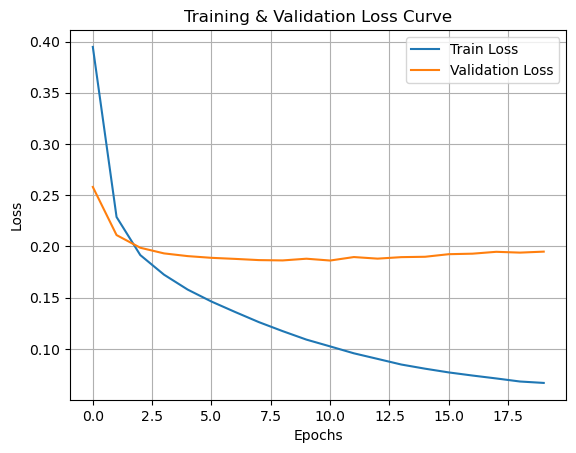

In [57]:
# Get input and output sizes
input_size = next(iter(train_loader_tfidf))[0].shape[1]  # Feature size
num_classes = next(iter(train_loader_tfidf))[1].shape[1]  # Number of labels

# Initialize the model
model = MultiLabelNN(input_size, num_classes)

# Train the model
train_losses, val_losses = train_model(model, train_loader_tfidf, val_loader_tfidf, num_epochs=20)

# Plot train vs validation loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.title("Training & Validation Loss Curve")
plt.show()

In [58]:
# Save the model
torch.save(model.state_dict(), "model.pth")

In [63]:
import torch
from sklearn.metrics import classification_report

# Load the model
model = MultiLabelNN(input_size, num_classes)
model.load_state_dict(torch.load("model.pth"))

def test_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []
    
    correct=0
    total=0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            
            for i in range(len(predictions)):
                if predictions[i].sum() == 0:
                    max_index = torch.argmax(outputs[i])
                    predictions[i][max_index] = 1
            
            all_predictions.append(predictions.cpu())
            all_labels.append(labels.cpu())
            correct += (predictions == labels).sum().item()
            total += labels.numel()

    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100:.2f}%")

    all_predictions = torch.cat(all_predictions, dim=0).numpy()
    all_labels = torch.cat(all_labels, dim=0).numpy()

    print(classification_report(all_labels, all_predictions, zero_division=0, target_names=['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']))
    
print("Testing the model on the Train set:")
test_model(model, train_loader_tfidf)

print("Testing the model on the val set:")
test_model(model, val_loader_tfidf)

print("Testing the model on the test set:")
test_model(model, test_loader_tfidf)

/tmp/ipykernel_6147/543267029.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


Testing the model on the Train set:
Accuracy: 99.59%
                      precision    recall  f1-score   support

    Computer Science       0.98      1.00      0.99      4273
             Physics       1.00      0.99      1.00      3020
         Mathematics       0.99      0.99      0.99      2812
          Statistics       0.99      1.00      0.99      2608
Quantitative Biology       0.99      0.92      0.95       309
Quantitative Finance       1.00      0.89      0.94       124

           micro avg       0.99      0.99      0.99     13146
           macro avg       0.99      0.96      0.98     13146
        weighted avg       0.99      0.99      0.99     13146
         samples avg       0.99      0.99      0.99     13146

Testing the model on the val set:
Accuracy: 92.30%
                      precision    recall  f1-score   support

    Computer Science       0.81      0.86      0.83      1713
             Physics       0.89      0.88      0.89      1193
         Mathematics    

In [60]:
tfidf = joblib.load('tfidf_vectorizer.pkl')

model.eval()

new_data = [ 
    "quantum physics and its applications", 
    "mathematics and statistics in data science", 
    "financial markets and stock prices", 
    "biology and genetics",
    "econometrics and financial modeling",
    "probability theory in finance modeling stocks using stochastic calculus",
    "maxwell equation and its applications in physics"
]

X_new = tfidf.transform(new_data)

X_new_tensor = torch.tensor(X_new.toarray(), 
dtype=torch.float32)

In [61]:
print(X_new_tensor.shape)

prediction = model(X_new_tensor)
print("Prediction for new data:", prediction)

torch.Size([7, 51009])
Prediction for new data: tensor([[0.0282, 0.9867, 0.0582, 0.0050, 0.0011, 0.0021],
        [0.4279, 0.2665, 0.1404, 0.5181, 0.0138, 0.0035],
        [0.0104, 0.0167, 0.3114, 0.0415, 0.0217, 0.8379],
        [0.0640, 0.0417, 0.1915, 0.0647, 0.2131, 0.0155],
        [0.0288, 0.0368, 0.2237, 0.1651, 0.0272, 0.1675],
        [0.1024, 0.0664, 0.0681, 0.0994, 0.0421, 0.1054],
        [0.0266, 0.5000, 0.7719, 0.0010, 0.0028, 0.0043]],
       grad_fn=<SigmoidBackward0>)


In [62]:
topics = ["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]

for i, pred in enumerate(prediction):
    binary_pred = (pred > 0.3).int()
    
    active_topics = [topics[j] for j, val in enumerate(binary_pred) if val == 1]
    
    if not active_topics:
        max_index = torch.argmax(pred).item()
        active_topics = [topics[max_index]]
    
    print(f"{new_data[i]}: {active_topics}")

quantum physics and its applications: ['Physics']
mathematics and statistics in data science: ['Computer Science', 'Statistics']
financial markets and stock prices: ['Mathematics', 'Quantitative Finance']
biology and genetics: ['Quantitative Biology']
econometrics and financial modeling: ['Mathematics']
probability theory in finance modeling stocks using stochastic calculus: ['Quantitative Finance']
maxwell equation and its applications in physics: ['Physics', 'Mathematics']


## Model 2, Dataset 1

In [4]:
import torch
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to extract data from a PyTorch DataLoader
def extract_data(loader):
    X, y = [], []
    for inputs, labels in loader:
        X.append(inputs.view(inputs.size(0), -1).numpy())  # Flatten input
        y.append(labels.numpy())
    return np.vstack(X), np.vstack(y)

# Extract data from the train, validation, and test loaders
X_train, y_train = extract_data(train_loader_tfidf)
X_val, y_val = extract_data(val_loader_tfidf)
X_test, y_test = extract_data(test_loader_tfidf)

In [5]:
# print the shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

print(type(X_test))

(10485, 51009) (10485, 6)
(4194, 51009) (4194, 6)
(6292, 51009) (6292, 6)
<class 'numpy.ndarray'>


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred, target_names=['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']))


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x719ede9fb560>
Traceback (most recent call last):
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_co

                      precision    recall  f1-score   support

    Computer Science       0.78      0.79      0.79      2607
             Physics       0.91      0.74      0.82      1800
         Mathematics       0.77      0.71      0.74      1686
          Statistics       0.72      0.70      0.71      1593
Quantitative Biology       0.51      0.19      0.27       144
Quantitative Finance       0.73      0.42      0.54        78

           micro avg       0.79      0.73      0.76      7908
           macro avg       0.74      0.59      0.64      7908
        weighted avg       0.79      0.73      0.76      7908
         samples avg       0.77      0.76      0.75      7908



/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
import joblib

tfidf = joblib.load('tfidf_vectorizer.pkl')

new_data = [ 
    "quantum physics and its applications", 
    "mathematics and statistics in data science", 
    "financial markets and stock prices",
    "fluid dynamics",
    "network security",
    "machine learning and deep learning",
    "population modeling in biology"
]

X_new = tfidf.transform(new_data).toarray()

print(X_new.shape)
print(type(X_new))

(7, 51009)
<class 'numpy.ndarray'>


In [39]:
y_new = knn.predict(X_new)

target_names = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

predicted_classes = []

for pred in y_new:
    classes = [target_names[i] for i, val in enumerate(pred) if val == 1]
    predicted_classes.append(classes if classes else ["No Class Assigned"])

for i, classes in enumerate(predicted_classes):
    print(f"{new_data[i]}: {', '.join(classes)}")

quantum physics and its applications: Physics
mathematics and statistics in data science: Mathematics
financial markets and stock prices: Quantitative Finance
fluid dynamics: Physics
network security: Computer Science
machine learning and deep learning: Computer Science, Statistics
population modeling in biology: Computer Science


## Model 1, Dataset 2

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define training function
def train_model(model, train_loader, val_loader, num_epochs=5, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()  # Cross Entropy for single class classification
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Ensure labels are float
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

In [83]:
import torch.nn as nn
# simple Feedforward Neural Network
class MultiLabelNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        self.sigmoid = nn.Sigmoid()  # sigmoid activation for multilabel

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)

Epoch 1/20 - Train Loss: 1.4650, Val Loss: 1.2690
Epoch 2/20 - Train Loss: 1.1228, Val Loss: 1.0435
Epoch 3/20 - Train Loss: 0.9897, Val Loss: 0.9844
Epoch 4/20 - Train Loss: 0.9542, Val Loss: 0.9643
Epoch 5/20 - Train Loss: 0.9411, Val Loss: 0.9547
Epoch 6/20 - Train Loss: 0.9337, Val Loss: 0.9487
Epoch 7/20 - Train Loss: 0.9300, Val Loss: 0.9446
Epoch 8/20 - Train Loss: 0.9263, Val Loss: 0.9416
Epoch 9/20 - Train Loss: 0.9241, Val Loss: 0.9388
Epoch 10/20 - Train Loss: 0.9226, Val Loss: 0.9372
Epoch 11/20 - Train Loss: 0.9209, Val Loss: 0.9351
Epoch 12/20 - Train Loss: 0.9198, Val Loss: 0.9337
Epoch 13/20 - Train Loss: 0.9186, Val Loss: 0.9329
Epoch 14/20 - Train Loss: 0.9179, Val Loss: 0.9317
Epoch 15/20 - Train Loss: 0.9173, Val Loss: 0.9307
Epoch 16/20 - Train Loss: 0.9166, Val Loss: 0.9299
Epoch 17/20 - Train Loss: 0.9159, Val Loss: 0.9297
Epoch 18/20 - Train Loss: 0.9155, Val Loss: 0.9287
Epoch 19/20 - Train Loss: 0.9153, Val Loss: 0.9280
Epoch 20/20 - Train Loss: 0.9146, Val Lo

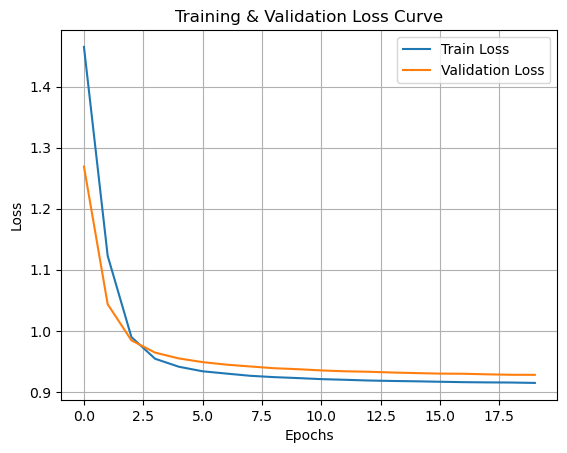

In [86]:
# Get input and output sizes
input_size = next(iter(train_loader_tfidf))[0].shape[1]  # Feature size
num_classes = 5  # Number of labels

# Initialize the model
model = MultiLabelNN(input_size, num_classes)

# Train the model
train_losses, val_losses = train_model(model, train_loader_tfidf, val_loader_tfidf, num_epochs=20)

# Plot train vs validation loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.title("Training & Validation Loss Curve")
plt.show()

In [87]:
# Save the model
torch.save(model.state_dict(), "model_d2.pth")

In [91]:
import torch
from sklearn.metrics import classification_report
import numpy as np

# Load the trained model
model = MultiLabelNN(input_size, num_classes)
model.load_state_dict(torch.load("model_d2.pth"))
model.eval()

def test_model(model, test_loader):
    all_predictions = []
    all_labels = []
    
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)  # Raw logits from the model
            predicted_classes = torch.argmax(outputs, dim=1)  # Get the class index with highest probability
            
            all_predictions.append(predicted_classes.cpu().numpy())  # Convert to numpy
            all_labels.append(labels.cpu().numpy())

            correct += (predicted_classes == labels).sum().item()
            total += labels.numel()

    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Convert lists to numpy arrays
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    print(classification_report(all_labels, all_predictions, zero_division=0))

# Run the model on different datasets
print("Testing the model on the Train set:")
test_model(model, train_loader_tfidf)

print("Testing the model on the Validation set:")
test_model(model, val_loader_tfidf)

print("Testing the model on the Test set:")
test_model(model, test_loader_tfidf)


/tmp/ipykernel_5952/4272335433.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_d2.pth"))


Testing the model on the Train set:
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00       439
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00       749
           4       1.00      1.00      1.00       266

    accuracy                           1.00      1963
   macro avg       1.00      1.00      1.00      1963
weighted avg       1.00      1.00      1.00      1963

Testing the model on the Validation set:
Accuracy: 99.87%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      1.00      1.00       185
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00       278
           4       1.00      1.00      1.00       115

    accuracy                           1.00       785
   macro avg       

In [106]:
tfidf = joblib.load('tfidf_vectorizer_d2.pkl')

model.eval()

# Providing data for the classes: 'Entertainment' 'Healthcare' 'Sports' 'Technology' 'Tourism'
new_data = [ 
    "healthcare and medical research", 
    "January 22 1st T20 international Chennai India won by seven wickets Report Scorecard 25 2nd T20 international Kolkata dn Play starts at 1330 GMT Scorecard 28 3rd T20 international Rajkot dn Play starts at 1330 GMT Scorecard 31 4th T20 international Pune dn 1330 GMT February 2 5th T20 international Mumbai dn 1330 GMT6 1st ODI Nagpur dn 0800 GMT 9 2nd ODI Cuttack dn 0800 GMT 12 3rd ODI Ahmedabad dn 0800 GMT NB Fixtures and start times are subject to change The BBC is not responsible for any changes that may be made", 
    "technology and gadgets",
    "entertainment and movies",
    "Temples monasteries stupas river confluences valleys museums and a hill that can pull your car uphill Ladakh boasts of some mindblowing attractions and is known for its rugged beauty and Buddhist culture 1 Hour Suggested Time 2 Hours Suggested Time 2 Hour Suggested Time 2 Hours Suggested Time 2 Hours Suggested Time 23 Hours Suggested Time 12 Saka Dawa FestivalJune Hemis FestivalJuly Ladakh FestivalSeptember Losar FestivalDecember Recommended Options Average Price Upper Tukcha Road Leh Onwards Near Leh Bus Stand Leh Onwards Upper Tukcha Road Leh Onwards Average Price Leh Leh Onwards Near Leh Bus Stand Leh Onwards Near Leh Bus Stand Leh Onwards Average Price Near Leh Bus Stand Leh Onwards Sumur Nubra Valley Onwards Near Leh Bus Stand Leh Onwards Nestled in the charming state of Jammu and Kashmir Ladakh city is a place like no other You can explore breathtaking landscapes serene religious shrines as well and incredible viewpoints here You can also find a beautiful amalgamation of different cultures and religions here The peaceful ambience here will soothe your senses allowing you to reconnect with nature The a href time to visitthis tourist site is from March to July With chilly winds and medium to heavy rainfalls the Ladakh weather becomes ideal for exploration and other adventure activities Further you can also witness the traditional festivals like Natho Nagrang Sako Dawa and Sindhu Darshan of the region during the season which give a boost to Ladakh tourism This tourist site is wellconnected to other parts of the country and is accessible to reach Kushok Bakula Rimpochee Airport is the nearest airport at a distance of 8 km from Leh Further there are two major highways connecting the territory via bus ManaliLeh Highway and SrinagarLeh Highway Also you can drop off at Jammu Tawi Railway Station and take a bus or a cab from there Engulfed with dramatic landscapes the Union Territory is one of the best places you can explore There are plenty ofthings to do in Ladakh as it has beautiful monasteries stupas and palaces along with a ton of trekking spots that offer experiences worth a lifetime If you have some time you can also head out and explore various places to near Ladakh including Kargil and Kishtwar With a bundle of attractions this tourist destination has plenty of mesmerising sites that will leave you speechless One of the top Ladakh tourist placesDiskit Monasterywas built in the 14th Century the site offers a majestic view of the serene mountains along with peace At an altitude of nearly 12 thousand feetThiksey Gompais another magnificent monastery that houses around 500 monks The Gompa has a massive collection of Buddhist journals scripts statues stupas and more Thiscrystalclear lakestretches between Eastern Ladakh and West Tibet It is set at a height of 4225 m Not to mention you can also enjoy charming views of the surrounding region from here The traditional and cosy Alchi Kitchen serves a wide range of Ladakhi cuisines that are fingerlicking good Soup stews and hearty pulao dishes are the specialities of the restaurant Sky Wok is an amazing restaurant serving a bit of everything on its plates With its modern ambience and strong WiFi it is a multicuisine restaurant that is a mustvisit for experiencing the Ladakh nightlife Decorated with woodworks of traditional Ladakhi architecture Zasgyath is a multicuisine restaurant Some of the popular delicacies of the restaurant are Ladakhi Mokmok butter chicken mutton rogan josh and more The semidesert valley with a bewitching view of the snowcovered mountains along with the crystal clear river Zanskar Valley is among the most beautiful sites to explore here Famous for Bactrian camel rides monasteries and orchids Nubra Valley is another magnificent place With a backdrop of the colossal Himalayan mountains Nubra Valley is an incredibly beautiful place To enjoy absolute serenity with starry nights and snowclad mountain peaks you should Markha Valley which is a popular place after trekking For a regal stay the luxurious 5star Grand Dragon Hotel is one of the best stay options Experience the splendour of the Himalayas from the comfort of your lavish rooms filled with opulent amenities Overlooking the splendid Himalayan ranges The Abduz is a 5star hotel offering luxury at its best With upscale amenities and proximity to the airport the Grand Hotel is a nice option to unwind Nubra Sarai offers camp experience along with Swiss tent cabins to guests Surrounded by lush greenery sprawling in the magnificent Nubra Valley you can enjoy a more downtoearth experience here The lipsmacking delicacies are one of the reasons to this tourist site Some of the musttry food in this hilly destination are Ladakhi Pulao Thukpa Chhutagi Tingmo and Skyu The authentic Ladakhi flavour in all these dishes will take you closer to its culture To find Tibetan artefacts and traditional garments along with woollen clothing Moti Market is the place to be One of the oldest marketplaces in this hilly region it offers a myriad of souvenirs for its tourists To get the best of the authentic heritage of this tourist site Main Bazaar is the ideal spot From traditional Ladakhi jewellery to artefacts the marketplace sells it all at an affordable price Completely managed and run by local women as a way to establish their presence in the business sphere this market sells stationery shawls and spices Country India Tourist Places in Ladakh Pangong Tso Stok Palace Diskit Monastery Thiksey Gompa Leh Palace Near Leh Best Time to Ladakh March to July Ladakh is famous for Adventure Hills Mountains Wildlife Trek Memorable Experiences With its indescribable beauty this tourist site is truly heaven to explore on Earth Whether you are travelling with your family or friends it has something for every kind of traveller What are the best places to in Ladakh The most loved attractions in Ladakh are Pangong Tso Diskit Monastery and Thiksey Gompa What are the popular things to explore in Ladakh The most loved tourist places to explore in Ladakh are Pangong Tso Diskit Monastery and Thiksey Gompa You will have an amazing time exploring these places and come back home with a bag full of memories How is the weather of Ladakh in peak season The weather of Ladakh in peak season is chilly winds and medium to heavy rainfall during monsoons It means you can easily plan a trip in this season for maximum fun during this season 2025MAKEMYTRIP PVT LTD CountryIndiaUSUAE"
]


X_new = tfidf.transform(new_data)

X_new_tensor = torch.tensor(X_new.toarray(), 
dtype=torch.float32)

In [107]:
print(X_new_tensor.shape)

prediction = model(X_new_tensor)
print("Prediction for new data:", prediction)

predicted_classes = torch.argmax(prediction, dim=1)
print(predicted_classes)

torch.Size([5, 94769])
Prediction for new data: tensor([[0.0089, 0.8729, 0.0106, 0.1701, 0.0099],
        [0.0130, 0.1440, 0.3870, 0.1064, 0.0293],
        [0.0044, 0.0275, 0.0084, 0.9898, 0.0080],
        [0.8981, 0.0780, 0.0079, 0.0230, 0.0099],
        [0.0075, 0.0093, 0.0062, 0.0157, 0.9945]], grad_fn=<SigmoidBackward0>)
tensor([1, 2, 3, 0, 4])


In [114]:
import torch

topics = ['Entertainment', 'Healthcare', 'Sports', 'Technology', 'Tourism']

predicted_topics = [topics[i] for i in predicted_classes.tolist()]

for i in range(len(new_data)):
    print(f"{new_data[i] [:50]}: {predicted_topics[i]}")


healthcare and medical research: Healthcare
January 22 1st T20 international Chennai India won: Sports
technology and gadgets: Technology
entertainment and movies: Entertainment
Temples monasteries stupas river confluences valle: Tourism


## Model 2 Dataset 2

In [117]:
import torch
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to extract data from a PyTorch DataLoader
def extract_data(loader):
    X, y = [], []
    for inputs, labels in loader:
        labels = labels.reshape((labels.shape[0], 1))
        X.append(inputs.view(inputs.size(0), -1).numpy())  # Flatten input
        y.append(labels.numpy())
    return np.vstack(X), np.vstack(y)

# Extract data from the train, validation, and test loaders
X_train, y_train = extract_data(train_loader_tfidf)
X_val, y_val = extract_data(val_loader_tfidf)
X_test, y_test = extract_data(test_loader_tfidf)

In [118]:
# print the shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

print(type(X_test))

(1963, 94769) (1963, 1)
(785, 94769) (785, 1)
(1179, 94769) (1179, 1)
<class 'numpy.ndarray'>


In [119]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [120]:
# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred, target_names=['Entertainment', 'Healthcare', 'Sports', 'Technology', 'Tourism']))


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x719dbd2b7380>
Traceback (most recent call last):
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_co

               precision    recall  f1-score   support

Entertainment       0.99      1.00      1.00       170
   Healthcare       1.00      0.99      0.99       289
       Sports       0.99      1.00      0.99        92
   Technology       1.00      0.99      0.99       447
      Tourism       0.99      0.99      0.99       181

     accuracy                           0.99      1179
    macro avg       0.99      1.00      1.00      1179
 weighted avg       0.99      0.99      0.99      1179



In [126]:
import joblib

tfidf = joblib.load('tfidf_vectorizer_d2.pkl')

new_data = [ 
    "measl vaccin measl rubeola cdc skip directli site content skip directli search offici websit unit state govern here know offici websit use gov gov websit belong offici govern organ unit state secur gov websit use http lock http mean youv safe connect gov websit share sensit inform offici secur websit measl rubeola explor topic search search clear input everyon symptom complic spread vaccin plan travel measl case outbreak measl resourc view health care provid clinic overview vaccin recommend view public health health depart lab test view relat topic rubella view search close search search measl rubeola menu close search everyon symptom complic spread vaccin plan travel measl case outbreak measl resourc view home health care provid clinic overview vaccin recommend view public health health depart lab test view relat topic rubella view measl rubeola symptom complic spread vaccin plan travel measl case outbreak measl resourc view januari espaol measl vaccin key point two dose mmr vaccin recommend doctor best way protect measl mump rubella children may get dose mmrv vaccin instead mmr mmrv vaccin usual protect peopl life measl rubella immun mump may decreas time introduct best way protect measl get measl mump rubella mmr vaccin children may get measl mump rubella varicella mmrv vaccin instead protect chickenpox peopl vaccin mmr mmrv protect life vaccin high rate vaccin made diseas much less common unit state avail vaccin two vaccin protect measl mump rubella mmr mmrv vaccin may given time vaccin mmr contain combin measl mump rubella vaccin two mmr vaccin avail use unit state mmr ii priorix recommend similarli consid interchang mmrv contain combin measl mump rubella varicella chickenpox vaccin vaccin licens use children month year age recommend mmr mmrv vaccin may given time vaccin healthcar provid give inform get mmr children need dose mmr vaccin month old st dose year old nd dose older children adolesc adult also need dose mmr vaccin dont evid immun dose separ least day apart anyon travel intern fulli vaccin travel infant month old get dose mmr vaccin travel get dose first birthday peopl increas risk mump mump outbreakan addit dose mmr may need public health author notifi increas risk receiv extra dose alreadi dose mmr necessari seek vaccin unless author tell part group keep read mmr recommend intern travel mmrv children month year age may given dose mmrv vaccin dose usual given month old st dose year old nd dose also given month st dose exposur measl mump rubella dont immun diseas becom expos talk doctor get mmr vaccin harm get mmr vaccin expos measl mump rubella may possibl prevent later diseas get mmr vaccin within hour initi expos measl may get protect milder ill case may given medicin call immunoglobulin ig within day expos measl provid protect diseas ill milder unlik measl mmr shown effect prevent mump rubella peopl alreadi infect get vaccin import mmr vaccin protect child measl mump rubella potenti seriou diseas caus virus almost everyon mmr vaccin get sick expos virus vaccin keep child miss school childcar miss work care sick child vaccin also limit size durat spread outbreak measl mmr vaccin protect child get uncomfort rash high fever measl mump mmr vaccin protect child get fever swollen gland ear jaw mump rubella mmr vaccin prevent child get rash fever rubella vaccin also prevent child spread rubella pregnant woman whose unborn babi could develop seriou birth defect die mother get rubella get vaccin mmr vaccin import children well adult evid immun includ student posthigh school educ institut healthcar personnel intern travel peopl childbear age get pregnant group increas risk mump mump outbreak shouldnt get vaccin peopl get mmr vaccin wait peopl check healthcar provid whether get vaccin allerg reaction previou dose mmr mmrv vaccin sever lifethreaten allergi may pregnant wait get mmr vaccin longer pregnant avoid get pregnant least month get mmr vaccin weaken immun system due diseas medic treatment famili member histori immun system problem ever condit make bruis bleed easili recent blood transfus receiv blood product might advis postpon mmr vaccin month tuberculosi gotten vaccin past week feel unwel sever ill doctor advis addit peopl wait get mmrv vaccin tell provid histori seizur parent brother sister histori seizur take plan take salicyl aspirin vaccin safe effect mmr vaccin safe effect prevent measl mump rubella vaccin like medicin side effect usual mild go away link mmr vaccin autism scientist unit state countri care studi mmr vaccin none found link autism mmr vaccin safe breastfeed women receiv mmr vaccin breastfeed interfer respons mmr vaccin babi affect vaccin breast milk one dose mmr vaccin effect measl effect mump effect rubella two dose mmr vaccin effect measl effect mump mmr provid effect protect mump peopl immun mump may decreas time peopl may longer protect mump later life vaccin peopl may still get measl mump rubella expos virus could immun system didnt respond well vaccin immun system abil fight infect decreas time prolong close contact someon viru howev diseas symptom gener milder vaccin peopl also less like spread diseas peopl possibl side effect peopl dont side effect vaccin side effect occur usual mild may includ sore red swell vaccin given fever mild rash temporari pain stiff joint seriou side effect rare may includ high fever could caus seizur find pay vaccin child doctor offic usual best place receiv recommend vaccin vaccin may also avail pharmaci workplac commun health clinic health depart school religi center keep read find vaccin vaccin cost way cover cost vaccin health insur health insur plan cover cost vaccin howev may want check insur provid go healthcar provid check cost inform list innetwork vaccin provid vaccin children program children may abl get nocost vaccin vaccin children vfc program program help famili elig children may abl afford access vaccin keep read pay vaccin frequent ask question childcar school vaccin requir state dc state law requir children enter childcar student start school certain vaccin feder law requir acip recommend state requir group date mmr vaccin student school set higher likelihood spread diseas constantli close contact mmr vaccin prevent outbreak set mean less ill less school time miss student less chanc expos peopl get vaccin dont know vaccin statu your unsur whether youv vaccin first tri find vaccin record dont written document mmr vaccin get vaccin especi your travel intern mmr vaccin safe there harm get anoth dose may alreadi immun measl mump rubella receiv measl vaccin may need revaccin peopl document receiv live measl vaccin need revaccin peopl vaccin prior either inactiv kill measl vaccin measl vaccin unknown type revaccin get least dose live attenu measl vaccin recommend intend protect may receiv kill measl vaccin vaccin avail effect resourc vaccin inform statement mmr mmrv vaccin schedul children parent reason follow cdc immun schedul prepar child shot introduct avail vaccin recommend get vaccin import get vaccin vaccin safe effect possibl side effect find pay vaccin frequent ask question resourc januari sourc print share facebook linkedin twitter syndic content sourc nation center immun respiratori diseas divis viral diseas footnot accept evid immun measl mump rubella includ least one follow written document adequ vaccin laboratori evid immun laboratori confirm diseas birth vaccin avail nearli everyon infect virus childhood born like infect natur therefor presum protect measl mump rubella healthcar personnel born without laboratori evid immun diseas consid get dose mmr vaccin measl rubeola measl one contagi diseas danger babi young children best protect measl mmr vaccin view everyon symptom complic spread vaccin plan travel measl case outbreak measl resourc health care provid clinic overview vaccin recommend public health health depart lab test sign email updat call contact cdc cdc cdc organ budget fund career job polici access extern link privaci web polici foia oig fear act nondiscrimin vulner disclosur polici languag languag espaol languag assist espaol ting vit tagalog kreyl ayisyen franai polski portugu italiano deutsch english archiv cdc archiv public health public call contact cdc cdc organ budget fund career job cdc polici access extern link privaci web polici foia oig fear act nondiscrimin vulner disclosur polici languag languag espaol languag assist espaol ting vit tagalog kreyl ayisyen franai polski portugu italiano deutsch english archiv cdc archiv public health public hhsgov usagov", 
    "January 22 1st T20 international Chennai India won by seven wickets Report Scorecard 25 2nd T20 international Kolkata dn Play starts at 1330 GMT Scorecard 28 3rd T20 international Rajkot dn Play starts at 1330 GMT Scorecard 31 4th T20 international Pune dn 1330 GMT February 2 5th T20 international Mumbai dn 1330 GMT6 1st ODI Nagpur dn 0800 GMT 9 2nd ODI Cuttack dn 0800 GMT 12 3rd ODI Ahmedabad dn 0800 GMT NB Fixtures and start times are subject to change The BBC is not responsible for any changes that may be made", 
    "technology and gadgets",
    "entertainment and movies",
    "Temples monasteries stupas river confluences valleys museums and a hill that can pull your car uphill Ladakh boasts of some mindblowing attractions and is known for its rugged beauty and Buddhist culture 1 Hour Suggested Time 2 Hours Suggested Time 2 Hour Suggested Time 2 Hours Suggested Time 2 Hours Suggested Time 23 Hours Suggested Time 12 Saka Dawa FestivalJune Hemis FestivalJuly Ladakh FestivalSeptember Losar FestivalDecember Recommended Options Average Price Upper Tukcha Road Leh Onwards Near Leh Bus Stand Leh Onwards Upper Tukcha Road Leh Onwards Average Price Leh Leh Onwards Near Leh Bus Stand Leh Onwards Near Leh Bus Stand Leh Onwards Average Price Near Leh Bus Stand Leh Onwards Sumur Nubra Valley Onwards Near Leh Bus Stand Leh Onwards Nestled in the charming state of Jammu and Kashmir Ladakh city is a place like no other You can explore breathtaking landscapes serene religious shrines as well and incredible viewpoints here You can also find a beautiful amalgamation of different cultures and religions here The peaceful ambience here will soothe your senses allowing you to reconnect with nature The a href time to visitthis tourist site is from March to July With chilly winds and medium to heavy rainfalls the Ladakh weather becomes ideal for exploration and other adventure activities Further you can also witness the traditional festivals like Natho Nagrang Sako Dawa and Sindhu Darshan of the region during the season which give a boost to Ladakh tourism This tourist site is wellconnected to other parts of the country and is accessible to reach Kushok Bakula Rimpochee Airport is the nearest airport at a distance of 8 km from Leh Further there are two major highways connecting the territory via bus ManaliLeh Highway and SrinagarLeh Highway Also you can drop off at Jammu Tawi Railway Station and take a bus or a cab from there Engulfed with dramatic landscapes the Union Territory is one of the best places you can explore There are plenty ofthings to do in Ladakh as it has beautiful monasteries stupas and palaces along with a ton of trekking spots that offer experiences worth a lifetime If you have some time you can also head out and explore various places to near Ladakh including Kargil and Kishtwar With a bundle of attractions this tourist destination has plenty of mesmerising sites that will leave you speechless One of the top Ladakh tourist placesDiskit Monasterywas built in the 14th Century the site offers a majestic view of the serene mountains along with peace At an altitude of nearly 12 thousand feetThiksey Gompais another magnificent monastery that houses around 500 monks The Gompa has a massive collection of Buddhist journals scripts statues stupas and more Thiscrystalclear lakestretches between Eastern Ladakh and West Tibet It is set at a height of 4225 m Not to mention you can also enjoy charming views of the surrounding region from here The traditional and cosy Alchi Kitchen serves a wide range of Ladakhi cuisines that are fingerlicking good Soup stews and hearty pulao dishes are the specialities of the restaurant Sky Wok is an amazing restaurant serving a bit of everything on its plates With its modern ambience and strong WiFi it is a multicuisine restaurant that is a mustvisit for experiencing the Ladakh nightlife Decorated with woodworks of traditional Ladakhi architecture Zasgyath is a multicuisine restaurant Some of the popular delicacies of the restaurant are Ladakhi Mokmok butter chicken mutton rogan josh and more The semidesert valley with a bewitching view of the snowcovered mountains along with the crystal clear river Zanskar Valley is among the most beautiful sites to explore here Famous for Bactrian camel rides monasteries and orchids Nubra Valley is another magnificent place With a backdrop of the colossal Himalayan mountains Nubra Valley is an incredibly beautiful place To enjoy absolute serenity with starry nights and snowclad mountain peaks you should Markha Valley which is a popular place after trekking For a regal stay the luxurious 5star Grand Dragon Hotel is one of the best stay options Experience the splendour of the Himalayas from the comfort of your lavish rooms filled with opulent amenities Overlooking the splendid Himalayan ranges The Abduz is a 5star hotel offering luxury at its best With upscale amenities and proximity to the airport the Grand Hotel is a nice option to unwind Nubra Sarai offers camp experience along with Swiss tent cabins to guests Surrounded by lush greenery sprawling in the magnificent Nubra Valley you can enjoy a more downtoearth experience here The lipsmacking delicacies are one of the reasons to this tourist site Some of the musttry food in this hilly destination are Ladakhi Pulao Thukpa Chhutagi Tingmo and Skyu The authentic Ladakhi flavour in all these dishes will take you closer to its culture To find Tibetan artefacts and traditional garments along with woollen clothing Moti Market is the place to be One of the oldest marketplaces in this hilly region it offers a myriad of souvenirs for its tourists To get the best of the authentic heritage of this tourist site Main Bazaar is the ideal spot From traditional Ladakhi jewellery to artefacts the marketplace sells it all at an affordable price Completely managed and run by local women as a way to establish their presence in the business sphere this market sells stationery shawls and spices Country India Tourist Places in Ladakh Pangong Tso Stok Palace Diskit Monastery Thiksey Gompa Leh Palace Near Leh Best Time to Ladakh March to July Ladakh is famous for Adventure Hills Mountains Wildlife Trek Memorable Experiences With its indescribable beauty this tourist site is truly heaven to explore on Earth Whether you are travelling with your family or friends it has something for every kind of traveller What are the best places to in Ladakh The most loved attractions in Ladakh are Pangong Tso Diskit Monastery and Thiksey Gompa What are the popular things to explore in Ladakh The most loved tourist places to explore in Ladakh are Pangong Tso Diskit Monastery and Thiksey Gompa You will have an amazing time exploring these places and come back home with a bag full of memories How is the weather of Ladakh in peak season The weather of Ladakh in peak season is chilly winds and medium to heavy rainfall during monsoons It means you can easily plan a trip in this season for maximum fun during this season 2025MAKEMYTRIP PVT LTD CountryIndiaUSUAE"
]

X_new = tfidf.transform(new_data).toarray()

print(X_new.shape)
print(type(X_new))

(5, 94769)
<class 'numpy.ndarray'>


In [130]:
y_new = knn.predict(X_new)

topics = ['Entertainment', 'Healthcare', 'Sports', 'Technology', 'Tourism']

predicted_topics = [topics[i] for i in y_new]

for i in range(len(new_data)):
    print(f"{new_data[i] [:50]}: {predicted_topics[i]}")

measl vaccin measl rubeola cdc skip directli site : Healthcare
January 22 1st T20 international Chennai India won: Sports
technology and gadgets: Technology
entertainment and movies: Entertainment
Temples monasteries stupas river confluences valle: Tourism
